In [1]:
#######################################################################
# Copyright (C)                                                       #
# 2016 Shangtong Zhang(zhangshangtong.cpp@gmail.com)                  #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# goal
GOAL = 100

# all states, including state 0 and state 100
states = np.arange(GOAL + 1)

# probability of head
head_prob = 0.4

# optimal policy
policy = np.zeros(GOAL + 1)

# state value
state_value = np.zeros(GOAL + 1)
state_value[GOAL] = 1.0

# value iteration
while True:
    delta = 0.0
    for state in states[1:GOAL]:
        # get possilbe actions for current state
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []
        for action in actions:
            action_returns.append(head_prob * state_value[state + action] + (1 - head_prob) * state_value[state - action])
        new_value = np.max(action_returns)
        delta += np.abs(state_value[state] - new_value)
        # update state value
        state_value[state] = new_value
    if delta < 1e-9:
        break

# calculate the optimal policy
for state in states[1:GOAL]:
    actions = np.arange(min(state, GOAL - state) + 1)
    action_returns = []
    for action in actions:
        action_returns.append(head_prob * state_value[state + action] + (1 - head_prob) * state_value[state - action])
    # due to tie, can't reproduce the optimal policy in book
    policy[state] = actions[np.argmax(action_returns)]

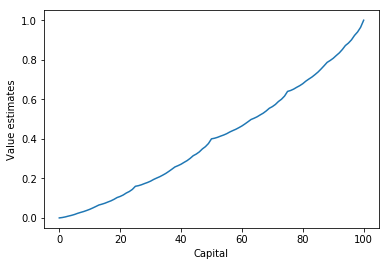

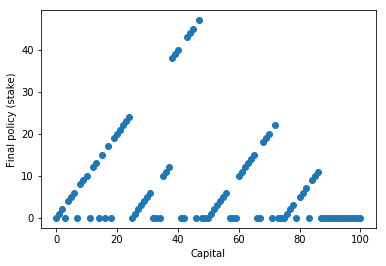

In [3]:
# Figure 4.3
plt.figure(1)
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.plot(state_value)
plt.figure(2)
plt.scatter(states, policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()